# Text Mining

Credit to: [Youngeui Kim](https://cis.appstate.edu/directory/youngeui-kim-phd), [Yuxiao (Rain) Luo](https://yuxiaoluo.github.io)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuxiaoLuo/AI_Intro/blob/main/week11_ImageMining_1.ipynb)

'''

my review text:

I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!

'''

# Word Cloud

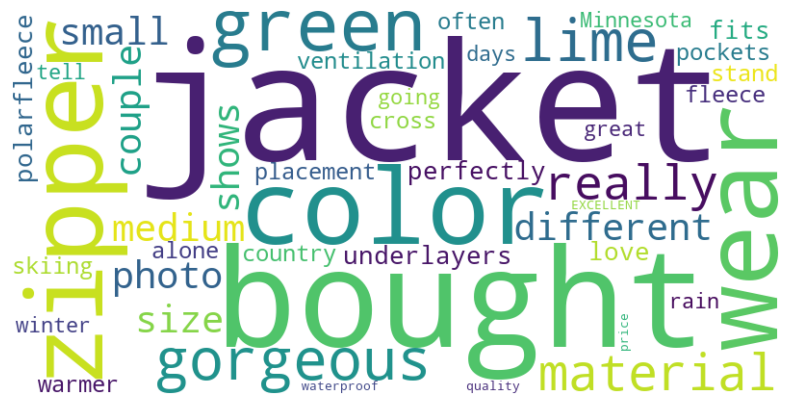

In [2]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text to analyze
text = """
I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!
"""

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Checking word frequency in graph

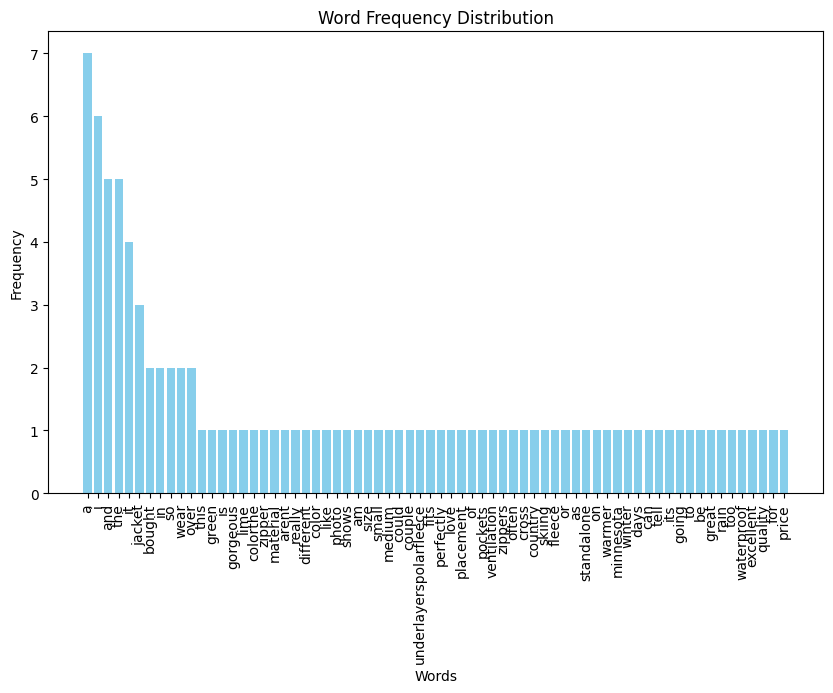

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Text to analyze
text = """
I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!
"""

# Preprocess text to remove special characters and make everything lowercase
text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

# Tokenize text into words
words = text.split()

# Calculate word frequency
word_freq = Counter(words)

# Get the most common words and their counts
most_common_words = word_freq.most_common()

# Separate words and their counts
words, counts = zip(*most_common_words)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

## Sentiment analysis 1

In [4]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Perform sentiment analysis
result = sentiment_pipeline(text)

# Output result
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\YuxiaoLuo\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YuxiaoLuo\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9996438026428223}]


## Sentiment analysis 2


In [6]:
%%cmd
pip install textblob

Microsoft Windows [Version 10.0.26100.3476]
(c) Microsoft Corporation. All rights reserved.

C:\Users\YuxiaoLuo\Documents\python3\AI_Intro>pip install textblob
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00

C:\Users\YuxiaoLuo\Documents\python3\AI_Intro>

In [7]:
from textblob import TextBlob

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Perform sentiment analysis
blob = TextBlob(text)
sentiment_score = blob.sentiment.polarity

# Determine sentiment
sentiment = "positive" if sentiment_score > 0 else "negative"

# Output result
print(f"Sentiment: {sentiment} (Score: {sentiment_score})")

Sentiment: positive (Score: 0.34375)


## Subjectivity analysis


In [8]:
from textblob import TextBlob

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Perform sentiment analysis
blob = TextBlob(text)
sentiment_score = blob.sentiment.polarity

# Determine sentiment
sentiment = "positive" if sentiment_score > 0 else "negative"

# Perform subjectivity analysis
subjectivity_score = blob.sentiment.subjectivity
subjectivity = "subjective" if subjectivity_score > 0.5 else "objective"

# Output result
print(f"Sentiment: {sentiment} (Score: {sentiment_score})")
print(f"Subjectivity: {subjectivity} (Score: {subjectivity_score})")

Sentiment: positive (Score: 0.34375)
Subjectivity: subjective (Score: 0.56875)


## Spam detection (pre-trained)

In [9]:
from transformers import pipeline

# Load spam detection pipeline
spam_pipeline = pipeline("text-classification", model="mrm8488/bert-tiny-finetuned-sms-spam-detection", framework="pt")

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Perform spam detection
spam_result = spam_pipeline(text)
spam_label = "spam" if spam_result[0]['label'] == "spam" else "ham"

# Output result
print(f"Spam Detection: {spam_label}")

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

C:\Users\YuxiaoLuo\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YuxiaoLuo\.cache\huggingface\hub\models--mrm8488--bert-tiny-finetuned-sms-spam-detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/324 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Spam Detection: ham


## Spam detection (customized)

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# training dataset
trainingData = {
    'text': [
        'Free money!!!', 
        'Hi, how are you?', 
        'Click this link to win a prize!', 
        'Meeting at 10am tomorrow.',
        'Limited time offer, act now!',
        'Let’s grab lunch next week.',
        'I bought this jacket in green and it is a gorgeous lime color.'
    ],
    'label': [1, 0, 1, 0, 1, 0, 0]  # 1 for spam, 0 for not spam
}

# Create a DataFrame
df = pd.DataFrame(trainingData)

# Split the data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example of detecting spam in the jacket review text
new_texts = [
    "I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows."
    "I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly."
    "I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days."
    "I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"
]

new_texts_vectorized = vectorizer.transform(new_texts)
predictions = model.predict(new_texts_vectorized)

for text, prediction in zip(new_texts, predictions):
    print(f"'{text}' is {'spam' if prediction == 1 else 'not spam'}")

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

'I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!' is not spam


C:\Users\YuxiaoLuo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YuxiaoLuo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YuxiaoLuo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf